# **Estudo Dirigido 6 - Kernel**

**Aluno:** André Paiva Conrado Rodrigues

**Matéria:** ENGG64 - Visão Computacional - 2023.2

## 1 - Importação de dependências e configurações

Para esta atividade é utilizada a `machinevisiontoolbox` do Peter Corke e a biblioteca `matplotlib` para exibição de imagens, além da biblioteca `seaborn` para facilitar alguns plots.

In [ ]:
from machinevisiontoolbox import *
from matplotlib import pyplot as plt

## 2 - Abrindo a imagem

Primeiramente, é importada a imagem original com representação numérica em `double`.

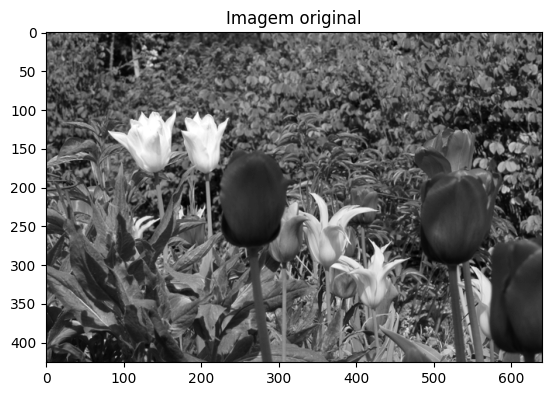

In [2]:
# Leitura da imagem original
flowers = Image.Read("flowers4.png", mono=True, dtype='double')

# Exibição da imagem original
fig, ax = plt.subplots(1, 1)
im = ax.imshow(flowers.image, cmap='gray')
ax.set_title('Imagem original')
plt.show()

## 3 - Geração de Kernel Médio

A seguir, é gerado um Kernel Médio $15 \times 15$, gravado na variável `kU`. O Kernel é visualizado por meio do `matplotlib`.

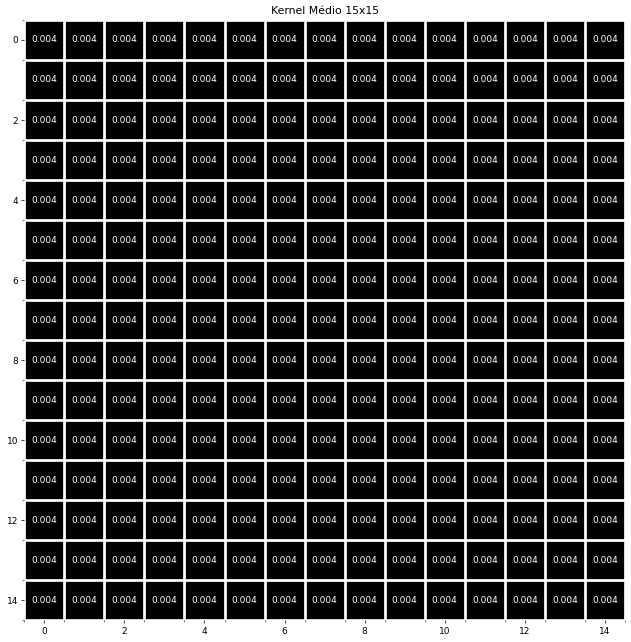

In [3]:
# Geração de Kernel Médio 15x5
kU = Kernel.Box(h=7)

# Plot do Kernel Médio
fig, ax = plt.subplots(figsize=(14, 12))
fig.set_dpi(65)
kU_plot = ax.imshow(kU, cmap='gray', vmin=0, vmax=1)
ax.set_title('Kernel Médio 15x15')
ax.spines[:].set_visible(False)
ax.set_xticks(np.arange(kU.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(kU.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
for i in range(kU.shape[0]):
    for j in range(kU.shape[1]):
        text = ax.text(j, i, f"{kU[i, j]:.3f}",
                       ha="center", va="center", color="w")
plt.show()

## 4 - Aplicação de Kernel Médio à imagem

A seguir, a imagem original importada no início do presente notebook é convoluída com o Kernel Médio (resultado gravado na variável `imU`). Posteriormente a imagem será mostrada lado a lado com a imagem convoluída com um Kernel Gaussiano, para efeito de comparação.

In [4]:
# Convolução da imagem com Kernel Médio
imU = flowers.convolve(kU)

## 5 - Geração de Kernel Gaussiano

A seguir, é gerado um Kernel Gaussiano com `sigma = 5` e `h = 8`, gravado na variável `kG`. O Kernel é visualizado por meio do `matplotlib`.

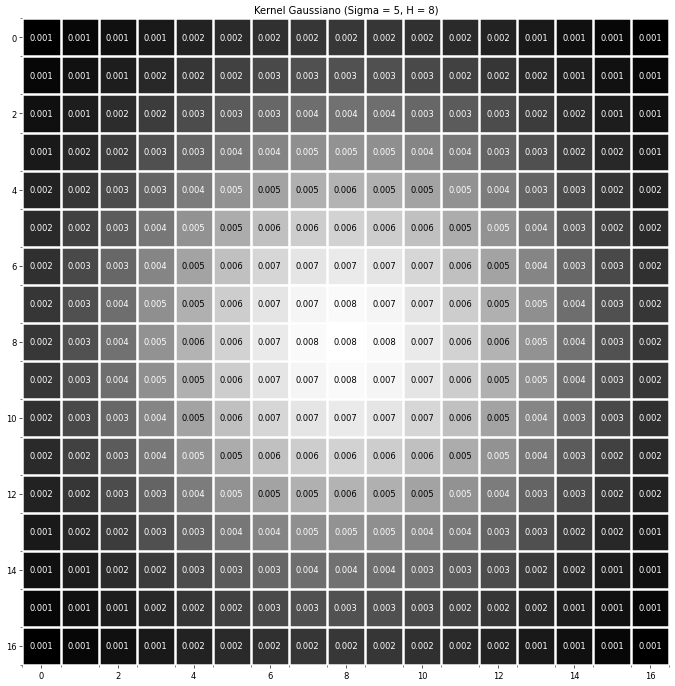

In [5]:
# Geração de Kernel Gaussiano com Sigma = 5
kG = Kernel.Gauss(sigma = 5, h = 8)

# Plot do Kernel Gaussiano
fig, ax = plt.subplots(figsize=(14, 14))
fig.set_dpi(60)
kG_plot = ax.imshow(kG, cmap='gray')
ax.set_title('Kernel Gaussiano (Sigma = 5, H = 8)')
ax.spines[:].set_visible(False)
ax.set_xticks(np.arange(kG.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(kG.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
for i in range(kG.shape[0]):
    for j in range(kG.shape[1]):
        c = 'black' if kG[i, j] >= 0.005 else 'white'
        text = ax.text(j, i, f"{kG[i, j]:.3f}",
                       ha="center", va="center", color=c)
plt.show()

## 6 - Aplicação de Kernel Gaussiano à imagem

A seguir, a imagem original importada no início do presente notebook é convoluída com o Kernel Gaussiano (resultado gravado na variável `imG`).

In [6]:
# Convolução da imagem com Kernel Gaussiano
imG = flowers.convolve(kG)

## 7 - Comparação entre os Kernels

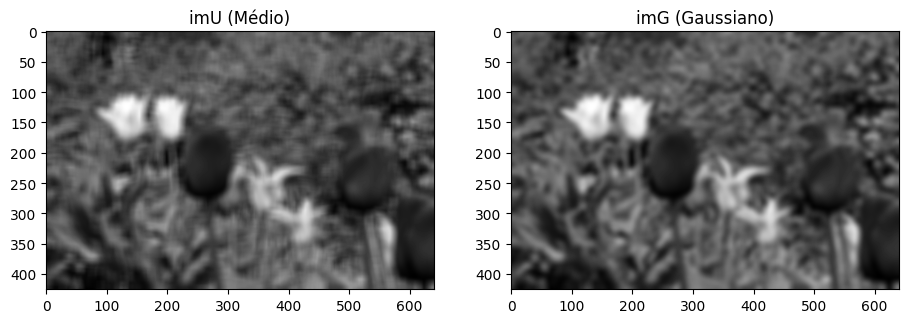

In [7]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
imU_plot = ax[0].imshow(imU.image, cmap='gray')
ax[0].set_title('imU (Médio)')
imG_plot = ax[1].imshow(imG.image, cmap='gray')
ax[1].set_title('imG (Gaussiano)')
plt.show()

Na imagem processada com o Kernel Médio, é possível ver alguns artefatos similares a linhas, que não se fazem presentes na imagem processada com o Kernel Gaussiano.